In [1]:
import torch
import glob, os 
import matplotlib.pyplot as plt
from skimage import io, transform as transf
from torch import nn
from torchvision import datasets
from torchvision.transforms import transforms
from torch.utils.data.sampler import SubsetRandomSampler
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
img_path = '/Users/aryansaha/Desktop/DevELOPment/DeepLearningProjects/BeeProject/images/P9603-117r.jpg'

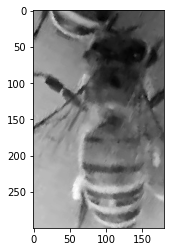

In [3]:
bgr_img = cv2.imread(img_path)
# convert to grayscale
gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)

# normalize, rescale entries to lie in [0,1]
gray_img = gray_img.astype("float32")/255

# plot image
plt.imshow(gray_img, cmap='gray')
plt.show()

In [4]:
num_workers = 20
batch_size = 20
valid_size = 0.2

transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

path="/Users/aryansaha/Desktop/DevELOPment/DeepLearningProjects/BeeProject/images"
imlist= glob.glob(os.path.join(path, '*.jpg'))


In [5]:
def dataset(file_list,size=(300,180),flattened=False):
    data = []
    for i, file in enumerate(file_list):
        image = io.imread(file)
        print(image)
        image = transf.resize(image, size, mode='constant')
        if flattened:
            image = image.flatten()

        data.append(image)

    labels = [1 if f.split("/")[-1][0] == 'P' else 0 for f in file_list]

    return np.array(data), np.array(labels)

In [6]:
X,y=dataset(imlist)

[[[ 64 134 168]
  [ 64 134 168]
  [ 63 133 167]
  ...
  [ 65 129 157]
  [ 65 129 157]
  [ 66 130 158]]

 [[ 64 134 168]
  [ 64 134 168]
  [ 63 133 167]
  ...
  [ 65 129 157]
  [ 65 129 157]
  [ 65 129 157]]

 [[ 64 134 168]
  [ 63 133 167]
  [ 63 133 167]
  ...
  [ 65 129 157]
  [ 65 129 157]
  [ 65 129 157]]

 ...

 [[ 83 140 167]
  [ 83 140 167]
  [ 83 140 167]
  ...
  [ 91 147 172]
  [ 91 147 172]
  [ 91 147 172]]

 [[ 83 140 167]
  [ 83 140 167]
  [ 83 140 167]
  ...
  [ 91 147 172]
  [ 91 147 172]
  [ 91 147 172]]

 [[ 84 141 168]
  [ 84 141 168]
  [ 84 141 168]
  ...
  [ 91 147 174]
  [ 91 147 174]
  [ 91 147 174]]]
[[[ 62 121 155]
  [ 61 120 154]
  [ 59 119 153]
  ...
  [ 61 120 150]
  [ 62 121 151]
  [ 63 122 152]]

 [[ 62 121 155]
  [ 61 120 154]
  [ 60 119 153]
  ...
  [ 60 119 149]
  [ 61 120 150]
  [ 62 121 151]]

 [[ 61 120 154]
  [ 61 120 154]
  [ 60 119 153]
  ...
  [ 59 118 148]
  [ 60 119 149]
  [ 61 120 150]]

 ...

 [[ 84 145 176]
  [ 84 145 176]
  [ 84 145 176]
  ..

[[[ 40  99 133]
  [ 40  99 133]
  [ 40  99 133]
  ...
  [ 36  82 106]
  [ 36  82 106]
  [ 37  83 107]]

 [[ 42  98 133]
  [ 41  97 132]
  [ 40  96 131]
  ...
  [ 36  82 108]
  [ 36  82 108]
  [ 37  83 109]]

 [[ 44 100 135]
  [ 42  98 133]
  [ 41  97 132]
  ...
  [ 36  82 108]
  [ 36  82 108]
  [ 36  83 109]]

 ...

 [[ 43 103 137]
  [ 43 103 137]
  [ 43 103 137]
  ...
  [ 46 107 138]
  [ 46 107 138]
  [ 47 108 139]]

 [[ 42 102 136]
  [ 43 103 137]
  [ 43 103 137]
  ...
  [ 47 106 138]
  [ 46 107 138]
  [ 47 108 139]]

 [[ 43 103 137]
  [ 43 103 137]
  [ 43 103 137]
  ...
  [ 47 106 138]
  [ 46 107 138]
  [ 47 108 139]]]
[[[ 60 119 151]
  [ 60 119 151]
  [ 60 119 151]
  ...
  [ 71  59  47]
  [ 74  62  50]
  [ 78  64  51]]

 [[ 61 120 152]
  [ 61 120 152]
  [ 60 119 151]
  ...
  [ 73  59  48]
  [ 77  63  52]
  [ 79  65  52]]

 [[ 61 120 152]
  [ 61 120 152]
  [ 61 120 152]
  ...
  [ 76  62  51]
  [ 79  65  54]
  [ 79  65  52]]

 ...

 [[ 84 143 177]
  [ 84 143 177]
  [ 84 143 177]
  ..

[[[ 55 124 163]
  [ 55 124 163]
  [ 54 124 160]
  ...
  [ 50 115 147]
  [ 50 115 147]
  [ 50 115 147]]

 [[ 56 125 164]
  [ 55 125 161]
  [ 54 124 160]
  ...
  [ 50 115 147]
  [ 50 115 147]
  [ 50 115 147]]

 [[ 56 126 162]
  [ 55 125 161]
  [ 54 124 160]
  ...
  [ 50 115 147]
  [ 50 115 147]
  [ 50 115 147]]

 ...

 [[ 67 140 175]
  [ 67 140 175]
  [ 67 140 175]
  ...
  [ 75 134 164]
  [ 75 134 164]
  [ 76 135 165]]

 [[ 67 140 175]
  [ 67 140 175]
  [ 67 140 175]
  ...
  [ 77 134 164]
  [ 76 135 165]
  [ 77 136 166]]

 [[ 67 140 175]
  [ 67 140 175]
  [ 67 140 175]
  ...
  [ 76 133 163]
  [ 77 134 164]
  [ 76 135 165]]]
[[[ 49 105 132]
  [ 49 104 134]
  [ 49 104 134]
  ...
  [ 50 111 140]
  [ 49 110 139]
  [ 49 110 139]]

 [[ 48 104 131]
  [ 48 103 133]
  [ 49 104 134]
  ...
  [ 50 111 140]
  [ 49 110 139]
  [ 50 109 139]]

 [[ 49 105 132]
  [ 49 105 132]
  [ 49 104 134]
  ...
  [ 51 110 140]
  [ 51 110 140]
  [ 51 110 140]]

 ...

 [[ 54 117 152]
  [ 56 119 154]
  [ 57 120 155]
  ..

[[[ 51 118 144]
  [ 50 117 143]
  [ 49 116 142]
  ...
  [ 58 124 158]
  [ 58 124 158]
  [ 58 124 158]]

 [[ 51 118 144]
  [ 50 117 143]
  [ 49 116 142]
  ...
  [ 58 124 158]
  [ 58 124 158]
  [ 57 123 157]]

 [[ 50 117 143]
  [ 50 117 143]
  [ 49 116 142]
  ...
  [ 58 124 158]
  [ 57 123 157]
  [ 57 123 157]]

 ...

 [[ 77 137 165]
  [ 77 137 165]
  [ 77 137 165]
  ...
  [ 71 131 155]
  [ 71 131 155]
  [ 70 130 154]]

 [[ 77 137 165]
  [ 77 137 165]
  [ 77 137 165]
  ...
  [ 70 130 154]
  [ 70 130 154]
  [ 70 130 154]]

 [[ 77 137 165]
  [ 77 137 165]
  [ 77 137 165]
  ...
  [ 70 130 154]
  [ 70 130 154]
  [ 70 130 154]]]
[[[ 35 107 145]
  [ 35 104 143]
  [ 36 105 144]
  ...
  [ 35  93 131]
  [ 36  94 132]
  [ 36  94 132]]

 [[ 35 107 145]
  [ 36 105 144]
  [ 37 106 145]
  ...
  [ 35  93 131]
  [ 36  94 132]
  [ 36  94 132]]

 [[ 37 106 145]
  [ 36 105 144]
  [ 37 106 145]
  ...
  [ 35  93 131]
  [ 36  94 132]
  [ 36  94 132]]

 ...

 [[ 55 124 166]
  [ 55 124 166]
  [ 55 123 168]
  ..

[[[ 25  78 110]
  [ 28  81 113]
  [ 30  81 112]
  ...
  [ 35  91 124]
  [ 36  92 125]
  [ 36  92 125]]

 [[ 26  79 111]
  [ 27  80 112]
  [ 28  79 110]
  ...
  [ 36  92 125]
  [ 37  93 126]
  [ 36  92 125]]

 [[ 22  75 107]
  [ 22  75 107]
  [ 21  74 105]
  ...
  [ 37  93 126]
  [ 37  93 126]
  [ 35  91 124]]

 ...

 [[ 37  97 133]
  [ 35  95 131]
  [ 34  94 130]
  ...
  [ 38  97 139]
  [ 38  97 139]
  [ 38  97 139]]

 [[ 37  97 133]
  [ 36  96 132]
  [ 36  96 132]
  ...
  [ 41 100 142]
  [ 41 100 142]
  [ 41 100 142]]

 [[ 37  97 133]
  [ 37  97 133]
  [ 37  97 133]
  ...
  [ 41 100 142]
  [ 42 101 143]
  [ 42 101 143]]]
[[[ 35  76  96]
  [ 36  77  97]
  [ 36  77  97]
  ...
  [ 30  78  98]
  [ 31  79  99]
  [ 32  80 100]]

 [[ 35  76  96]
  [ 36  77  97]
  [ 35  78  97]
  ...
  [ 31  78  98]
  [ 32  79  99]
  [ 33  80 100]]

 [[ 35  76  96]
  [ 36  77  97]
  [ 36  79  98]
  ...
  [ 31  78  98]
  [ 32  79  99]
  [ 33  80 100]]

 ...

 [[ 72 141 172]
  [ 72 141 172]
  [ 72 141 172]
  ..

[[[ 62 126 161]
  [ 62 126 161]
  [ 62 126 161]
  ...
  [ 64 130 165]
  [ 65 131 166]
  [ 65 131 166]]

 [[ 62 126 161]
  [ 62 126 161]
  [ 61 125 160]
  ...
  [ 63 129 164]
  [ 64 130 165]
  [ 64 130 165]]

 [[ 62 126 161]
  [ 62 126 161]
  [ 61 125 160]
  ...
  [ 62 128 163]
  [ 63 129 164]
  [ 64 130 165]]

 ...

 [[ 81 140 174]
  [ 83 139 174]
  [ 83 139 174]
  ...
  [ 73 138 170]
  [ 72 137 169]
  [ 72 137 169]]

 [[ 81 140 174]
  [ 83 139 174]
  [ 83 139 174]
  ...
  [ 72 137 169]
  [ 72 137 169]
  [ 71 136 168]]

 [[ 80 139 173]
  [ 83 139 174]
  [ 83 139 174]
  ...
  [ 73 138 168]
  [ 72 137 167]
  [ 72 137 167]]]
[[[ 65 107 131]
  [ 63 103 128]
  [ 62 100 123]
  ...
  [ 71 116 139]
  [ 73 115 139]
  [ 75 115 140]]

 [[ 65 107 131]
  [ 64 104 129]
  [ 62 100 123]
  ...
  [ 71 119 141]
  [ 72 118 141]
  [ 75 117 141]]

 [[ 67 109 133]
  [ 65 105 130]
  [ 63 101 124]
  ...
  [ 69 121 143]
  [ 70 120 143]
  [ 73 121 144]]

 ...

 [[ 95 148 180]
  [ 95 148 180]
  [ 95 148 180]
  ..

[[[ 48 107 137]
  [ 47 106 136]
  [ 46 105 135]
  ...
  [ 50 105 135]
  [ 50 105 135]
  [ 51 106 136]]

 [[ 48 107 137]
  [ 48 107 137]
  [ 47 106 136]
  ...
  [ 50 105 135]
  [ 51 106 136]
  [ 51 106 136]]

 [[ 47 106 136]
  [ 47 106 136]
  [ 47 106 136]
  ...
  [ 49 106 135]
  [ 50 107 136]
  [ 50 107 136]]

 ...

 [[ 62 121 155]
  [ 61 120 154]
  [ 60 120 154]
  ...
  [ 60 124 152]
  [ 60 124 152]
  [ 60 124 152]]

 [[ 62 121 155]
  [ 60 120 154]
  [ 61 121 155]
  ...
  [ 60 124 152]
  [ 60 124 152]
  [ 60 124 152]]

 [[ 62 122 156]
  [ 60 120 154]
  [ 61 121 155]
  ...
  [ 60 124 152]
  [ 60 124 152]
  [ 60 124 152]]]
[[[ 68 127 159]
  [ 68 127 159]
  [ 67 126 158]
  ...
  [ 60 113 145]
  [ 60 113 145]
  [ 60 113 145]]

 [[ 67 126 158]
  [ 67 126 158]
  [ 67 126 158]
  ...
  [ 60 113 145]
  [ 60 113 145]
  [ 60 113 145]]

 [[ 67 126 158]
  [ 67 126 158]
  [ 67 126 158]
  ...
  [ 59 112 144]
  [ 59 112 144]
  [ 59 112 144]]

 ...

 [[ 73  83  95]
  [ 80  92 104]
  [ 83  99 112]
  ..

[[[ 52 116 151]
  [ 52 116 151]
  [ 50 114 149]
  ...
  [ 56 128 168]
  [ 56 128 168]
  [ 56 128 168]]

 [[ 52 117 149]
  [ 52 117 149]
  [ 50 115 147]
  ...
  [ 56 128 166]
  [ 56 128 166]
  [ 56 128 166]]

 [[ 52 117 149]
  [ 51 116 148]
  [ 50 115 147]
  ...
  [ 55 127 165]
  [ 56 128 166]
  [ 57 129 167]]

 ...

 [[ 72 148 184]
  [ 71 147 183]
  [ 71 147 183]
  ...
  [ 77 149 187]
  [ 77 149 187]
  [ 78 150 188]]

 [[ 71 147 183]
  [ 70 146 182]
  [ 70 146 182]
  ...
  [ 79 151 189]
  [ 79 151 189]
  [ 80 152 190]]

 [[ 72 148 184]
  [ 70 146 182]
  [ 70 146 182]
  ...
  [ 80 152 190]
  [ 80 152 190]
  [ 81 153 191]]]
[[[ 53 122 155]
  [ 53 122 155]
  [ 53 122 155]
  ...
  [ 72 144 182]
  [ 72 144 182]
  [ 72 144 182]]

 [[ 53 122 155]
  [ 52 121 154]
  [ 52 121 154]
  ...
  [ 73 145 183]
  [ 73 145 183]
  [ 73 145 183]]

 [[ 52 121 154]
  [ 52 121 154]
  [ 53 119 153]
  ...
  [ 73 145 183]
  [ 74 146 184]
  [ 73 145 183]]

 ...

 [[ 72 138 173]
  [ 72 138 173]
  [ 72 138 173]
  ..

[[[ 37  81 108]
  [ 39  83 110]
  [ 41  85 112]
  ...
  [ 32  63  81]
  [ 32  63  81]
  [ 33  64  82]]

 [[ 38  82 109]
  [ 40  84 111]
  [ 41  85 112]
  ...
  [ 37  68  86]
  [ 38  69  87]
  [ 35  66  84]]

 [[ 39  80 110]
  [ 40  81 111]
  [ 41  82 112]
  ...
  [ 45  76  94]
  [ 45  76  94]
  [ 39  70  88]]

 ...

 [[ 36  90 126]
  [ 37  91 127]
  [ 36  90 126]
  ...
  [ 66  59  51]
  [ 66  59  53]
  [ 66  59  53]]

 [[ 36  90 126]
  [ 37  91 127]
  [ 36  90 126]
  ...
  [ 62  55  49]
  [ 67  60  54]
  [ 70  63  57]]

 [[ 36  90 126]
  [ 37  91 127]
  [ 37  91 127]
  ...
  [ 62  55  49]
  [ 74  67  61]
  [ 81  74  68]]]
[[[ 58 127 158]
  [ 58 127 158]
  [ 58 127 158]
  ...
  [ 60 121 152]
  [ 61 122 153]
  [ 61 122 153]]

 [[ 60 126 158]
  [ 60 126 158]
  [ 59 125 157]
  ...
  [ 60 121 152]
  [ 60 121 152]
  [ 60 121 152]]

 [[ 60 126 158]
  [ 59 125 157]
  [ 59 125 157]
  ...
  [ 60 121 152]
  [ 60 121 152]
  [ 60 121 152]]

 ...

 [[ 81 138 167]
  [ 82 139 168]
  [ 82 139 169]
  ..

[[[ 80 148 183]
  [ 79 147 182]
  [ 78 146 181]
  ...
  [ 81 146 178]
  [ 81 146 178]
  [ 84 149 181]]

 [[ 80 148 183]
  [ 80 148 183]
  [ 79 147 182]
  ...
  [ 81 146 178]
  [ 81 146 178]
  [ 84 149 181]]

 [[ 81 149 184]
  [ 81 149 184]
  [ 81 149 184]
  ...
  [ 80 145 177]
  [ 82 147 179]
  [ 84 149 181]]

 ...

 [[188 211 227]
  [187 210 226]
  [187 210 226]
  ...
  [108 103  99]
  [108 103  99]
  [107 102  98]]

 [[166 185 200]
  [165 184 199]
  [165 182 198]
  ...
  [108 103  99]
  [107 102  98]
  [105 100  96]]

 [[146 162 177]
  [146 162 177]
  [146 162 177]
  ...
  [108 103  99]
  [107 102  98]
  [105 100  96]]]
[[[ 71 138 167]
  [ 70 137 166]
  [ 70 137 166]
  ...
  [ 89 154 186]
  [ 88 153 185]
  [ 88 153 185]]

 [[ 70 137 166]
  [ 70 137 166]
  [ 70 137 166]
  ...
  [ 90 155 187]
  [ 89 154 186]
  [ 89 154 186]]

 [[ 70 137 166]
  [ 70 137 166]
  [ 71 136 166]
  ...
  [ 91 156 188]
  [ 90 155 187]
  [ 89 154 186]]

 ...

 [[ 92 154 191]
  [ 92 154 191]
  [ 92 154 191]
  ..

[[[ 51  91 117]
  [ 54  94 120]
  [ 57  94 120]
  ...
  [ 84  65  58]
  [ 91  72  65]
  [ 94  75  68]]

 [[ 48  90 115]
  [ 52  92 118]
  [ 53  93 119]
  ...
  [ 76  57  50]
  [ 86  67  60]
  [ 97  78  71]]

 [[ 49  93 120]
  [ 49  93 118]
  [ 51  93 118]
  ...
  [ 79  60  53]
  [ 81  62  55]
  [ 82  63  56]]

 ...

 [[ 61 124 168]
  [ 62 125 168]
  [ 62 125 168]
  ...
  [ 64 123 157]
  [ 64 123 157]
  [ 64 123 157]]

 [[ 61 124 168]
  [ 61 124 168]
  [ 62 125 168]
  ...
  [ 64 123 157]
  [ 64 123 157]
  [ 64 123 157]]

 [[ 60 122 169]
  [ 61 124 168]
  [ 61 124 167]
  ...
  [ 63 123 157]
  [ 64 123 157]
  [ 64 123 157]]]
[[[ 28  81 112]
  [ 28  81 112]
  [ 27  80 111]
  ...
  [ 53  91 114]
  [ 53  91 114]
  [ 54  92 115]]

 [[ 28  81 112]
  [ 27  80 111]
  [ 26  79 110]
  ...
  [ 52  89 115]
  [ 52  89 115]
  [ 52  89 115]]

 [[ 28  81 112]
  [ 28  81 112]
  [ 27  80 111]
  ...
  [ 50  90 115]
  [ 50  90 115]
  [ 50  90 115]]

 ...

 [[ 54 116 157]
  [ 54 116 157]
  [ 55 117 158]
  ..

[[[ 43  94 123]
  [ 46  95 125]
  [ 46  95 125]
  ...
  [ 69 130 161]
  [ 67 128 159]
  [ 66 127 158]]

 [[ 45  96 125]
  [ 49  98 128]
  [ 41  90 120]
  ...
  [ 68 129 158]
  [ 66 127 158]
  [ 65 126 157]]

 [[ 52 103 132]
  [ 46  97 126]
  [ 43  92 122]
  ...
  [ 69 130 159]
  [ 67 128 157]
  [ 66 127 158]]

 ...

 [[ 97 156 190]
  [100 156 191]
  [100 156 189]
  ...
  [ 89 157 194]
  [ 89 157 194]
  [ 89 157 194]]

 [[ 99 158 192]
  [ 99 158 192]
  [ 99 158 190]
  ...
  [ 90 158 195]
  [ 90 158 195]
  [ 90 158 195]]

 [[100 159 193]
  [100 159 193]
  [100 159 193]
  ...
  [ 91 159 196]
  [ 91 159 196]
  [ 91 159 196]]]
[[[ 49  98 128]
  [ 48  99 128]
  [ 48  99 128]
  ...
  [ 53 114 143]
  [ 53 114 143]
  [ 53 114 143]]

 [[ 49  98 128]
  [ 48  99 128]
  [ 48  99 128]
  ...
  [ 52 113 142]
  [ 52 113 142]
  [ 52 113 142]]

 [[ 49 100 129]
  [ 48  99 128]
  [ 48  99 128]
  ...
  [ 52 113 142]
  [ 52 113 142]
  [ 52 113 142]]

 ...

 [[ 78 128 161]
  [ 78 128 161]
  [ 78 128 161]
  ..

[[[ 56 116 150]
  [ 56 116 150]
  [ 56 115 149]
  ...
  [ 57 117 151]
  [ 56 116 150]
  [ 54 117 150]]

 [[ 57 117 151]
  [ 57 117 151]
  [ 57 116 150]
  ...
  [ 56 116 150]
  [ 56 116 150]
  [ 54 117 150]]

 [[ 58 118 152]
  [ 57 117 151]
  [ 58 117 151]
  ...
  [ 56 116 150]
  [ 56 116 150]
  [ 53 116 149]]

 ...

 [[ 66 127 158]
  [ 66 127 158]
  [ 65 126 157]
  ...
  [ 75 134 166]
  [ 75 134 166]
  [ 75 134 166]]

 [[ 66 127 158]
  [ 66 127 158]
  [ 65 126 157]
  ...
  [ 75 134 166]
  [ 75 134 166]
  [ 75 134 166]]

 [[ 66 127 158]
  [ 65 126 157]
  [ 65 126 157]
  ...
  [ 74 135 166]
  [ 74 135 166]
  [ 74 135 166]]]
[[[ 59  87 101]
  [ 60  88 102]
  [ 60  88 100]
  ...
  [ 53 123 159]
  [ 54 124 160]
  [ 52 125 160]]

 [[ 59  87 101]
  [ 60  88 102]
  [ 60  88 100]
  ...
  [ 52 122 158]
  [ 53 123 159]
  [ 52 125 160]]

 [[ 59  87 101]
  [ 59  87  99]
  [ 60  88 100]
  ...
  [ 53 123 159]
  [ 53 123 159]
  [ 54 124 160]]

 ...

 [[ 57 123 157]
  [ 59 123 158]
  [ 60 123 156]
  ..

[[[127 112  89]
  [126 111  88]
  [122 110  86]
  ...
  [ 19  60  82]
  [ 20  61  83]
  [ 21  62  84]]

 [[127 112  89]
  [126 111  88]
  [122 110  86]
  ...
  [ 19  60  82]
  [ 20  61  83]
  [ 21  62  84]]

 [[127 112  89]
  [123 111  87]
  [121 109  85]
  ...
  [ 20  61  83]
  [ 21  62  84]
  [ 22  63  85]]

 ...

 [[ 33  78 107]
  [ 33  78 107]
  [ 33  79 105]
  ...
  [ 37  87 124]
  [ 37  87 124]
  [ 37  87 124]]

 [[ 33  79 105]
  [ 33  79 105]
  [ 33  79 105]
  ...
  [ 37  86 126]
  [ 37  86 126]
  [ 37  86 126]]

 [[ 33  79 105]
  [ 33  79 105]
  [ 33  79 105]
  ...
  [ 37  86 126]
  [ 37  86 126]
  [ 37  86 126]]]
[[[ 58 117 151]
  [ 57 116 150]
  [ 55 114 148]
  ...
  [ 48 104 137]
  [ 47 103 136]
  [ 47 103 136]]

 [[ 60 119 153]
  [ 59 118 152]
  [ 56 115 149]
  ...
  [ 48 104 137]
  [ 47 103 136]
  [ 47 103 136]]

 [[ 61 120 154]
  [ 60 119 153]
  [ 57 116 150]
  ...
  [ 48 104 137]
  [ 48 104 137]
  [ 48 104 137]]

 ...

 [[ 67 135 172]
  [ 67 135 172]
  [ 67 135 172]
  ..

[[[ 56 118 155]
  [ 55 117 154]
  [ 56 118 155]
  ...
  [ 35  34  32]
  [ 29  28  26]
  [ 25  24  22]]

 [[ 55 117 154]
  [ 55 117 154]
  [ 55 117 154]
  ...
  [ 28  27  25]
  [ 25  24  22]
  [ 24  23  21]]

 [[ 55 117 154]
  [ 55 117 154]
  [ 54 118 156]
  ...
  [ 28  27  25]
  [ 26  25  23]
  [ 24  23  21]]

 ...

 [[ 46 109 150]
  [ 45 108 149]
  [ 45 108 149]
  ...
  [ 52  42  30]
  [ 51  41  29]
  [ 51  41  29]]

 [[ 46 109 150]
  [ 45 108 149]
  [ 46 109 150]
  ...
  [ 52  42  30]
  [ 52  42  30]
  [ 51  41  29]]

 [[ 46 109 150]
  [ 46 109 150]
  [ 46 109 150]
  ...
  [ 52  42  30]
  [ 52  42  30]
  [ 52  42  30]]]
[[[ 48 112 140]
  [ 48 112 140]
  [ 48 112 140]
  ...
  [ 59 129 165]
  [ 60 130 166]
  [ 61 131 167]]

 [[ 47 111 139]
  [ 47 111 139]
  [ 47 111 139]
  ...
  [ 58 128 164]
  [ 60 130 166]
  [ 60 130 166]]

 [[ 49 110 139]
  [ 48 109 138]
  [ 48 109 138]
  ...
  [ 59 129 165]
  [ 60 130 166]
  [ 60 130 166]]

 ...

 [[ 77 119 143]
  [ 65 106 128]
  [ 67 105 128]
  ..

[[[ 72 141 174]
  [ 73 142 175]
  [ 73 142 175]
  ...
  [ 56 110 134]
  [ 55 109 133]
  [ 55 109 133]]

 [[ 72 141 174]
  [ 73 142 175]
  [ 73 142 175]
  ...
  [ 55 109 133]
  [ 55 109 133]
  [ 55 109 133]]

 [[ 72 141 174]
  [ 73 142 175]
  [ 74 143 176]
  ...
  [ 55 109 133]
  [ 55 109 133]
  [ 55 109 133]]

 ...

 [[ 86 151 181]
  [ 86 151 181]
  [ 85 150 180]
  ...
  [ 78 142 170]
  [ 78 142 170]
  [ 78 142 170]]

 [[ 86 151 181]
  [ 86 151 181]
  [ 85 150 180]
  ...
  [ 78 142 170]
  [ 78 142 170]
  [ 78 142 170]]

 [[ 87 152 182]
  [ 86 151 181]
  [ 85 150 180]
  ...
  [ 78 142 170]
  [ 78 142 170]
  [ 78 142 170]]]
[[[ 47 105 129]
  [ 46 104 128]
  [ 47 105 129]
  ...
  [ 53 114 143]
  [ 53 114 143]
  [ 52 113 142]]

 [[ 49 107 131]
  [ 47 105 129]
  [ 46 104 128]
  ...
  [ 53 114 143]
  [ 54 115 144]
  [ 54 115 144]]

 [[ 52 110 134]
  [ 49 107 131]
  [ 48 104 129]
  ...
  [ 53 114 143]
  [ 54 115 144]
  [ 55 116 145]]

 ...

 [[ 63 136 169]
  [ 63 136 169]
  [ 66 136 170]
  ..

[[[126 100  77]
  [124 100  76]
  [122 100  76]
  ...
  [ 37  67  78]
  [ 37  67  78]
  [ 37  67  78]]

 [[127 101  78]
  [125 101  77]
  [122 100  76]
  ...
  [ 37  67  78]
  [ 36  66  77]
  [ 36  66  77]]

 [[126 102  78]
  [126 102  78]
  [123 101  77]
  ...
  [ 36  66  77]
  [ 36  66  77]
  [ 36  66  77]]

 ...

 [[154 130 104]
  [154 130 104]
  [153 131 107]
  ...
  [ 52 111 143]
  [ 52 111 143]
  [ 53 112 144]]

 [[155 131 105]
  [155 131 105]
  [153 131 107]
  ...
  [ 52 111 143]
  [ 52 111 143]
  [ 53 112 144]]

 [[155 131 105]
  [155 131 105]
  [153 131 107]
  ...
  [ 52 111 143]
  [ 52 111 143]
  [ 53 112 144]]]
[[[ 51  98 128]
  [ 50  97 127]
  [ 49  96 126]
  ...
  [ 43  75  96]
  [ 40  72  93]
  [ 41  73  94]]

 [[ 51  98 128]
  [ 50  97 127]
  [ 49  96 126]
  ...
  [ 43  75  96]
  [ 40  72  93]
  [ 41  73  94]]

 [[ 51  98 126]
  [ 49  96 124]
  [ 49  96 124]
  ...
  [ 43  75  96]
  [ 40  72  93]
  [ 40  72  93]]

 ...

 [[ 54 108 142]
  [ 55 109 143]
  [ 55 109 143]
  ..

[[[ 49 104 134]
  [ 49 104 134]
  [ 49 104 134]
  ...
  [ 60 124 159]
  [ 61 125 160]
  [ 62 126 161]]

 [[ 48 103 133]
  [ 48 103 133]
  [ 48 103 133]
  ...
  [ 60 124 159]
  [ 61 125 160]
  [ 62 126 161]]

 [[ 49 104 134]
  [ 49 104 134]
  [ 49 104 134]
  ...
  [ 59 123 158]
  [ 60 124 159]
  [ 61 125 160]]

 ...

 [[ 61  68  84]
  [ 56  65  80]
  [ 61  72  90]
  ...
  [ 81 144 177]
  [ 81 144 177]
  [ 82 145 178]]

 [[ 68  77  92]
  [ 58  67  82]
  [ 60  72  88]
  ...
  [ 81 144 177]
  [ 81 144 177]
  [ 82 145 178]]

 [[ 79  88 103]
  [ 65  74  91]
  [ 65  76  94]
  ...
  [ 81 144 177]
  [ 81 144 177]
  [ 82 145 178]]]
[[[ 42 104 141]
  [ 42 104 141]
  [ 41 103 140]
  ...
  [ 29  75 108]
  [ 30  76 109]
  [ 30  76 109]]

 [[ 42 104 141]
  [ 42 104 141]
  [ 41 103 140]
  ...
  [ 29  75 108]
  [ 30  76 109]
  [ 30  77 107]]

 [[ 43 105 142]
  [ 42 104 141]
  [ 41 103 140]
  ...
  [ 29  75 108]
  [ 30  76 109]
  [ 30  77 107]]

 ...

 [[ 25  67  89]
  [ 25  67  89]
  [ 25  67  89]
  ..

[[[ 61  70  69]
  [ 49  58  57]
  [ 43  48  52]
  ...
  [ 55 109 135]
  [ 55 109 135]
  [ 56 110 136]]

 [[ 70  76  74]
  [ 58  64  64]
  [ 48  53  56]
  ...
  [ 55 109 135]
  [ 55 109 135]
  [ 56 110 136]]

 [[ 77  83  81]
  [ 67  73  73]
  [ 56  61  64]
  ...
  [ 55 109 135]
  [ 55 109 135]
  [ 56 110 136]]

 ...

 [[ 39  72  87]
  [ 39  72  87]
  [ 38  74  88]
  ...
  [ 65 139 168]
  [ 65 139 168]
  [ 65 139 168]]

 [[ 40  72  85]
  [ 41  73  86]
  [ 41  73  86]
  ...
  [ 65 139 168]
  [ 64 138 167]
  [ 65 139 168]]

 [[ 43  72  86]
  [ 43  72  86]
  [ 43  72  86]
  ...
  [ 65 139 168]
  [ 64 138 167]
  [ 64 138 167]]]
[[[ 57 121 156]
  [ 56 120 155]
  [ 56 120 155]
  ...
  [ 60 135 174]
  [ 60 135 174]
  [ 60 135 174]]

 [[ 57 121 156]
  [ 56 120 155]
  [ 56 120 155]
  ...
  [ 60 135 174]
  [ 60 135 174]
  [ 60 135 174]]

 [[ 56 122 156]
  [ 55 121 155]
  [ 55 121 155]
  ...
  [ 60 135 174]
  [ 60 135 174]
  [ 60 135 174]]

 ...

 [[ 71 145 180]
  [ 71 145 180]
  [ 72 146 183]
  ..

[[[ 32  90 114]
  [ 31  89 113]
  [ 32  88 113]
  ...
  [ 37  88 117]
  [ 37  88 117]
  [ 39  90 119]]

 [[ 32  90 114]
  [ 32  88 113]
  [ 32  88 113]
  ...
  [ 34  85 114]
  [ 36  87 116]
  [ 39  90 119]]

 [[ 33  89 114]
  [ 33  87 113]
  [ 32  86 112]
  ...
  [ 33  84 113]
  [ 35  86 115]
  [ 40  91 120]]

 ...

 [[ 49 115 150]
  [ 50 116 151]
  [ 50 116 151]
  ...
  [ 46 105 137]
  [ 47 106 138]
  [ 48 107 139]]

 [[ 47 115 150]
  [ 49 117 152]
  [ 52 118 153]
  ...
  [ 47 106 138]
  [ 48 107 139]
  [ 49 108 140]]

 [[ 47 115 150]
  [ 49 117 152]
  [ 51 119 154]
  ...
  [ 48 107 137]
  [ 49 108 138]
  [ 49 108 138]]]
[[[ 66 138 176]
  [ 66 138 176]
  [ 66 138 176]
  ...
  [ 57  80  88]
  [ 56  79  85]
  [ 56  80  84]]

 [[ 66 138 176]
  [ 66 138 176]
  [ 66 138 176]
  ...
  [ 57  80  88]
  [ 55  78  84]
  [ 56  80  84]]

 [[ 66 138 176]
  [ 66 138 176]
  [ 66 138 176]
  ...
  [ 56  79  87]
  [ 56  79  85]
  [ 57  81  85]]

 ...

 [[ 86 151 183]
  [ 86 151 183]
  [ 86 151 183]
  ..

[[[ 65 130 162]
  [ 64 129 161]
  [ 64 127 160]
  ...
  [ 56 113 142]
  [ 56 113 142]
  [ 57 114 143]]

 [[ 65 130 162]
  [ 64 129 161]
  [ 65 128 161]
  ...
  [ 56 113 142]
  [ 57 114 143]
  [ 57 114 143]]

 [[ 65 130 162]
  [ 64 129 161]
  [ 65 128 161]
  ...
  [ 57 112 142]
  [ 58 113 143]
  [ 58 113 143]]

 ...

 [[101  99 102]
  [102 100 103]
  [102 100 103]
  ...
  [136 186 213]
  [135 185 212]
  [135 185 212]]

 [[ 97  97  99]
  [ 98  98 100]
  [ 98  98 100]
  ...
  [136 186 213]
  [135 185 212]
  [136 186 213]]

 [[ 91  91  93]
  [ 92  92  94]
  [ 93  93  95]
  ...
  [141 188 216]
  [139 186 214]
  [140 187 215]]]
[[[ 41  99 137]
  [ 40  98 136]
  [ 39  97 135]
  ...
  [ 30  71  93]
  [ 29  70  92]
  [ 28  69  91]]

 [[ 42 100 138]
  [ 41  99 137]
  [ 40  98 136]
  ...
  [ 30  71  93]
  [ 29  70  92]
  [ 28  69  91]]

 [[ 44 102 140]
  [ 43 101 139]
  [ 42 100 138]
  ...
  [ 29  70  92]
  [ 28  69  91]
  [ 28  69  91]]

 ...

 [[ 44 102 140]
  [ 44 102 140]
  [ 44 102 140]
  ..

[[[ 45 112 154]
  [ 43 110 152]
  [ 41 109 148]
  ...
  [ 44 103 145]
  [ 44 103 145]
  [ 43 102 144]]

 [[ 45 112 154]
  [ 43 110 152]
  [ 41 109 148]
  ...
  [ 45 104 146]
  [ 44 103 145]
  [ 44 103 145]]

 [[ 38 105 147]
  [ 39 106 148]
  [ 43 108 150]
  ...
  [ 45 104 146]
  [ 45 104 146]
  [ 45 104 146]]

 ...

 [[ 22  53  84]
  [ 21  52  83]
  [ 21  52  81]
  ...
  [ 27  61  86]
  [ 25  61  87]
  [ 22  59  86]]

 [[ 23  54  85]
  [ 23  54  85]
  [ 23  57  85]
  ...
  [ 30  62  87]
  [ 25  59  84]
  [ 22  58  84]]

 [[ 26  57  88]
  [ 32  63  94]
  [ 41  75 103]
  ...
  [ 30  62  85]
  [ 27  59  84]
  [ 23  57  84]]]
[[[ 56 117 146]
  [ 58 119 148]
  [ 56 117 146]
  ...
  [ 62 125 156]
  [ 64 127 158]
  [ 65 128 159]]

 [[ 57 118 147]
  [ 57 118 147]
  [ 55 116 145]
  ...
  [ 61 124 155]
  [ 63 126 157]
  [ 63 128 158]]

 [[ 57 118 147]
  [ 57 118 147]
  [ 56 117 145]
  ...
  [ 59 124 154]
  [ 61 126 156]
  [ 61 126 156]]

 ...

 [[ 76 140 168]
  [ 76 140 168]
  [ 76 140 168]
  ..

[[[ 48 107 137]
  [ 48 107 137]
  [ 48 107 137]
  ...
  [ 52 111 143]
  [ 52 111 143]
  [ 52 111 143]]

 [[ 48 107 137]
  [ 48 107 137]
  [ 48 107 137]
  ...
  [ 52 111 143]
  [ 52 111 143]
  [ 52 111 143]]

 [[ 48 107 137]
  [ 48 107 137]
  [ 48 107 137]
  ...
  [ 52 111 143]
  [ 52 111 143]
  [ 52 111 143]]

 ...

 [[ 58 105 131]
  [ 59 106 132]
  [ 59 106 132]
  ...
  [ 38  87 117]
  [ 37  86 116]
  [ 36  85 115]]

 [[ 58 105 131]
  [ 58 105 131]
  [ 58 106 129]
  ...
  [ 38  87 117]
  [ 36  85 115]
  [ 35  84 114]]

 [[ 57 104 130]
  [ 58 105 131]
  [ 58 106 129]
  ...
  [ 37  86 116]
  [ 36  85 115]
  [ 35  84 114]]]
[[[ 59 124 154]
  [ 59 124 154]
  [ 59 124 154]
  ...
  [ 59 124 154]
  [ 60 125 155]
  [ 60 125 155]]

 [[ 58 123 153]
  [ 58 123 153]
  [ 58 123 153]
  ...
  [ 58 123 153]
  [ 59 124 154]
  [ 60 125 155]]

 [[ 58 123 153]
  [ 58 123 153]
  [ 58 123 153]
  ...
  [ 57 122 152]
  [ 58 123 153]
  [ 59 124 154]]

 ...

 [[ 74 138 173]
  [ 74 139 171]
  [ 74 139 171]
  ..

[[[ 53 104 131]
  [ 52 103 130]
  [ 52 103 130]
  ...
  [ 57 112 143]
  [ 57 112 143]
  [ 56 111 142]]

 [[ 53 104 131]
  [ 52 103 130]
  [ 52 103 130]
  ...
  [ 57 112 143]
  [ 58 113 144]
  [ 57 112 143]]

 [[ 53 104 131]
  [ 52 103 130]
  [ 52 103 130]
  ...
  [ 54 109 140]
  [ 56 111 142]
  [ 57 112 143]]

 ...

 [[ 62 118 145]
  [ 63 118 148]
  [ 63 120 149]
  ...
  [ 65 135 171]
  [ 66 136 172]
  [ 66 136 172]]

 [[ 60 117 146]
  [ 61 118 147]
  [ 60 119 149]
  ...
  [ 65 135 171]
  [ 65 135 171]
  [ 66 136 172]]

 [[ 58 117 147]
  [ 58 117 147]
  [ 59 118 148]
  ...
  [ 65 135 171]
  [ 65 135 171]
  [ 65 135 171]]]
[[[ 43 106 147]
  [ 43 106 147]
  [ 43 106 147]
  ...
  [ 41 104 145]
  [ 41 104 145]
  [ 41 104 145]]

 [[ 43 106 147]
  [ 43 106 147]
  [ 42 105 146]
  ...
  [ 41 104 145]
  [ 41 104 145]
  [ 42 105 146]]

 [[ 43 106 147]
  [ 42 105 146]
  [ 41 104 145]
  ...
  [ 42 105 146]
  [ 42 105 146]
  [ 42 105 146]]

 ...

 [[ 48  60  72]
  [ 51  64  73]
  [ 53  63  73]
  ..

[[[ 48 101 135]
  [ 52 105 139]
  [ 49 102 136]
  ...
  [ 52 120 157]
  [ 51 119 156]
  [ 50 118 155]]

 [[ 48 101 135]
  [ 49 102 136]
  [ 46  99 133]
  ...
  [ 52 120 157]
  [ 51 119 156]
  [ 51 119 156]]

 [[ 42  96 130]
  [ 50 103 137]
  [ 52 105 137]
  ...
  [ 52 120 157]
  [ 52 120 157]
  [ 52 120 157]]

 ...

 [[ 68 137 178]
  [ 69 136 178]
  [ 69 136 178]
  ...
  [ 83 156 197]
  [ 83 156 197]
  [ 84 157 198]]

 [[ 68 137 178]
  [ 68 137 178]
  [ 70 137 179]
  ...
  [ 84 157 198]
  [ 84 157 198]
  [ 85 158 199]]

 [[ 68 137 178]
  [ 69 138 179]
  [ 70 137 179]
  ...
  [ 85 158 199]
  [ 85 158 199]
  [ 85 158 199]]]
[[[ 68 131 166]
  [ 68 131 166]
  [ 68 131 166]
  ...
  [ 67 127 161]
  [ 67 127 161]
  [ 68 128 162]]

 [[ 68 131 166]
  [ 68 131 166]
  [ 68 131 166]
  ...
  [ 67 127 161]
  [ 67 127 161]
  [ 68 128 162]]

 [[ 67 130 165]
  [ 67 130 165]
  [ 67 130 165]
  ...
  [ 67 127 161]
  [ 67 127 161]
  [ 68 128 162]]

 ...

 [[ 96 146 179]
  [ 96 145 178]
  [ 96 145 178]
  ..

[[[ 51 111 147]
  [ 51 111 147]
  [ 51 111 147]
  ...
  [ 50 109 141]
  [ 50 109 141]
  [ 50 109 141]]

 [[ 50 110 146]
  [ 50 110 146]
  [ 50 110 146]
  ...
  [ 49 108 140]
  [ 49 108 140]
  [ 49 108 140]]

 [[ 51 111 147]
  [ 50 110 146]
  [ 50 110 144]
  ...
  [ 48 107 139]
  [ 48 107 139]
  [ 48 107 139]]

 ...

 [[ 56 122 156]
  [ 56 122 156]
  [ 56 122 156]
  ...
  [ 62 123 152]
  [ 62 123 152]
  [ 63 124 155]]

 [[ 56 122 156]
  [ 56 122 156]
  [ 56 122 156]
  ...
  [ 63 122 152]
  [ 64 123 153]
  [ 63 124 155]]

 [[ 56 122 156]
  [ 56 122 156]
  [ 56 122 156]
  ...
  [ 64 123 153]
  [ 64 123 153]
  [ 64 123 153]]]
[[[ 68 136 171]
  [ 66 134 169]
  [ 66 134 169]
  ...
  [ 57 124 153]
  [ 57 124 153]
  [ 57 124 153]]

 [[ 65 133 168]
  [ 65 133 168]
  [ 65 133 168]
  ...
  [ 57 124 153]
  [ 57 124 153]
  [ 57 124 153]]

 [[ 63 131 166]
  [ 64 132 167]
  [ 65 133 168]
  ...
  [ 57 124 153]
  [ 57 124 153]
  [ 57 124 153]]

 ...

 [[ 84 138 164]
  [ 84 138 164]
  [ 84 138 164]
  ..

In [52]:
print('The length of X: ',len(X))  # data
print('The shape of X: ',X.shape)  # target
print('The shape of Y', y.shape)

The length of X:  714
The shape of X:  (714, 300, 180, 3)
The shape of Y (714,)


In [67]:
from sklearn.model_selection import train_test_split

x_tr, x_test, y_tr, y_test = train_test_split(
    X, y, test_size=0.20)

x_train, validation_x_train, y_train, validation_y_train = train_test_split(
    x_tr, y_tr, test_size=0.26)

#x_train is train
#y_train is train
#validation_x_train is validation
#validation_y_train is validation
#x_test is test
#y_test is test


print('The size of the training set: ',len(x_train))
print('The size of the validation training set: ',len(validation_x_train))
print('The size of the testing set: ',len(x_test))

The size of the training set:  422
The size of the validation training set:  149
The size of the testing set:  143


In [98]:
print(x_train.shape)
print(y_train.shape)

from torch.utils.data import TensorDataset, DataLoader

# dataTrain = torch.Tensor(np.reshape(x_train,(3,422,300,180)))
# targetTrain = torch.Tensor(y_train)
x_tra = (np.reshape(x_train,(422,3,300,180)))
dataTrain = torch.from_numpy(x_tra)
targetTrain = torch.from_numpy(y_train)

train_set = TensorDataset(dataTrain,targetTrain)
train_loader = DataLoader(train_set)

print(dataTrain.shape)
print(targetTrain.shape)

(422, 300, 180, 3)
(422,)
torch.Size([422, 3, 300, 180])
torch.Size([422])


In [99]:
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # 3 conv layers, 1 pool maxPool, and then 2 linear layers + dropout
        #image comes in as 32x32, and depth of 3 for RGB
        #self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        #self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        #self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        
        self.conv1 = nn.Conv2d(3,64,3)
        self.conv2 = nn.Conv2d(64,64,3)
        self.conv3 = nn.Conv2d(64,128,3)
        self.conv4 = nn.Conv2d(128,128,3)
        self.conv5 = nn.Conv2d(128,256,3)
        self.conv6 = nn.Conv2d(256,256,3)
        self.conv7 = nn.Conv2d(256,512,3)
        
        self.pool = nn.MaxPool2d(2,2)
        self.fc2 = nn.Linear(512,1)
        self.dropout = nn.Dropout(0.5)     
        
    def forward(self, x):
#         x = self.pool(F.relu(self.conv1(x)))
#         x = self.pool(F.relu(self.conv2(x)))
#         x = self.pool(F.relu(self.conv3(x)))
#         x = x.view(-1 , 64*4*4)
#         x = self.dropout(x)
#         x = F.relu(self.fc1(x))
#         x = self.dropout(x)
#         x = F.relu(self.fc2(x))
        
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = F.relu(self.conv4(x))
        x = self.pool(F.relu(self.conv4(x)))
        x = F.relu(self.conv5(x))
        x = self.pool(F.relu(self.conv7(x)))
        x = x.view(-1 , 512)
        x = F.sigmoid(F.relu(self.fc2(x)))
        
        return x
model = Net()
print(model)

Net(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (conv6): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
  (conv7): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc2): Linear(in_features=512, out_features=1, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)


In [100]:
import torch.optim as optim

criterion = nn.BCELoss()
optimizer = optim.RMSprop(model.parameters(), lr=0.0001)

In [101]:
# number of epochs to train the model
n_epochs = 65

valid_loss_min = np.Inf # track change in validation loss

for epoch in range(1, n_epochs+1):

    # keep track of training and validation loss
    train_loss = 0.0
    valid_loss = 0.0

    model.train()
    for dataTrain, targetTrain in train_loader:
        print(dataTrain.shape)
              
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()*data.size(0)

    model.eval()
    for data, target in valid_loader:
        output = model(data)
        loss = criterion(output, target)
        valid_loss += loss.item()*data.size(0)
    
    # calculate average losses
    train_loss = train_loss/len(train_loader.sampler)
    valid_loss = valid_loss/len(valid_loader.sampler)
        
    # print training/validation statistics 
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))
    
    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model.state_dict(), 'model_cifar.pt')
        valid_loss_min = valid_loss

torch.Size([1, 3, 300, 180])


RuntimeError: Given groups=1, weight of size [64, 3, 3, 3], expected input[3, 422, 300, 180] to have 3 channels, but got 422 channels instead